# A Hypothetical World of Daisies

In this project, we consider a world containing two types of daisies: black and white. The project consists of a total of parts, with each part building on the previous to create a model with increasing complexity.

### Relevant Equations

The comparative growth of a single species of daisy is given by 

$$ \frac{dA_{i}}{dt} = A(x\beta_{i}-\gamma_{i})  $$

where $A_{i}$ is the area covered by the daisies, $x_{i}$ is the area of fertile ground not covered by daisies, $\beta_{i}$ is the growth rate of daisies and $\gamma_{i}$ is the death rate of daisies.

The growth rate of a particular species of daisy, $\beta_{i}$, is given by 

$$ \beta_{i} = 1 - 0.003265(22.5 - T_{i})^{2} $$

where $T_{i}$ is the daisies' local temperature. The growth rate is zero when the local temperature is 5 degrees Celsius and 40 degrees Celsius. It has a maximum of one when the local temperature is 22.5 degrees Celsius. This is the optimal temperature for daisy growth.

The effective temperature in Kelvins, $T_{e}$ at which the planet radiates is given by 

$$ T_{e}^{4} =  \frac{LS_{0}}{\sigma}(1 - \alpha_{p}) $$

where $\sigma$ is Stefan-Boltzmann’s constant, $S_{0}$ is a constant having units of flux, L is a dimensionless measure of the luminosity of the Daisyworld’s Sun and $\alpha_{p}$ is the albedo of the planet.

For simplicity, we ignore spherical geometry and treat the planet as if it were flat, or at best cylindrical. Then the albedo $\alpha_{p}$ (for a planet with black and white daisies) is simply 

$$ \alpha_{p} = A_{g}\alpha_{g} + A_{w}\alpha_{w} + A_{b}\alpha_{b} $$

where $A_{g}$ is the area, and $\alpha_{g}$, the albedo, of bare ground. $A_{w}$ and $A_{b}$ are the areas of ground covered by black and white daisies. $\alpha_{w}$ and $\alpha_{b}$ are the albedos of ground covered by black and white daisies.

The local temperature in Kelvins, $T_{i}$, for a single species of daisy is given by 

$$ T_{i}^{4} = \frac{RLS_{0}}{\sigma}(\alpha_{p} - \alpha_{i}) + T_{e}^{4} $$

where $R$ is the insulation constant and $\alpha_{i}$ is the albedo for this particular species of daisy.

In [1]:
# Importing relevant libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

As a starting point, we define a function that implements Euler method to solve for the first equation given above. This function can be used subsequently for a world with black daisies and a world containing both daisies.

In [2]:
# Physical constants
s = 5.670367*10**(-8) # Stefan-Boltzmann's constant (W m^-2 K^-4)
S0 = 917 # Luminosity constant
R = 0.2 # Insulation
gamma = 0.3 # Assume a constant death rate
alpha_g = 0.5 # Albedo of ground

# Defining a function with inputs luminosity, the area coverage for a particular species of daisy and its respective albedo  
# Function should outputs the evolution arrays of daisy area coverage with time and planet temperature with time
def Daisy_Area_Temp(L, A, alpha): 
    '''
    Function that uses Euler's method to solve the differential equation for the area coverage of a particular species of daisy.
    Outputs the evolution arrays of daisy area coverage with time and planet temperature with time
    
    Inputs:
    L: Luminosity
    A: Area coverage for a particular species
    alpha: Albedo for a specific species of daisy
    
    Outputs:
    A_data: (n x 2) Array containing area coverage of daisy over time
    Tp_data: (n x 2) Array containing planet temperature over time 
    '''
    delta_A = 1 # Arbitrary start 
    A_data = [] # Creating daisy area list
    Tp_data = [] # Creating planet temperature list
    
    t = 0 # Initial time assignment
    dt = 1 # Time step
    
    while delta_A > 0.00000001 :  
        # Planet's albedo
        alpha_p = A*alpha + (1-A)*alpha_g
        
        # Effective planet's temperature (in Kelvins)
        Tp = (L*(S0/s)*(1 - alpha_p))**(1/4)  
        Tp_data.append([t, Tp]) # Append into planet temperature list
        A_data.append([t, A])   # Append into area list for daisy
        
        # Local daisy's temperature (in Kelvins)
        Ti = (R*L*(S0/s)*(alpha_p - alpha) + Tp**(4))**(1/4) 
        
        # Growth rate of daisy
        beta_i = 1.0 - 0.003265*(295.5 - Ti)**2 
        
        # In case growth rate becomes negative
        if beta_i < 0: 
            beta_i = 0 #Setting it to negligible growth if the growth happens to be negative
        
        # Euler's Method
        x = 1 - A
        delta_A = A*(beta_i*x - 0.3)*dt 
        A_next = A + delta_A
        A = A_next
        t += dt
        
    A_data = np.array(A_data) 
    Tp_data = np.array(Tp_data)
    
    return A_data, Tp_data

### The Evolution of White Daisies' area coverage ($A_{w}$) against time ($t$)

We first model a world consisting only white daisies. We solve the above equation computationally using Euler's method and plot the results.

[19.          0.28928111]
[ 19.         288.38270199]


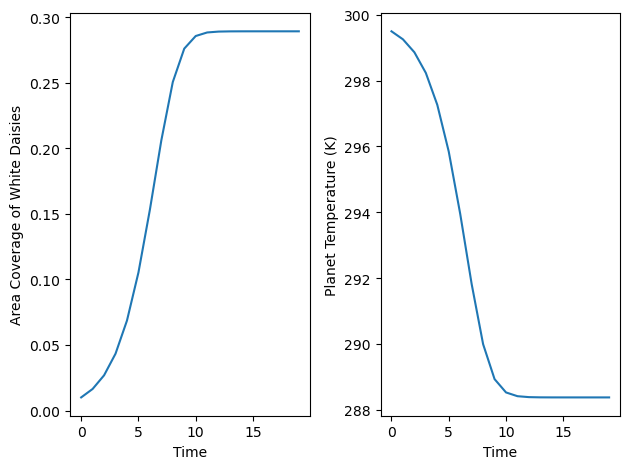

In [17]:
# Assume initial area coverage of white daisies is A_w = 0.01 
# Albedo of white daisies is alpha_w = 0.75
# Set luminosity to L = 1
A_white, Tp_white = Daisy_Area_Temp(L = 1, A = 0.01, alpha = 0.75)

fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].plot(A_white[:,0], A_white[:,1])
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Area Coverage of White Daisies')

ax[1].plot(Tp_white[:,0], Tp_white[:,1])
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Planet Temperature (K)')

plt.tight_layout()

print(A_white[A_white.shape[0]-1])
print(Tp_white[Tp_white.shape[0]-1])

We see that a steady-state solution has been reached for a planet with only white daisies.

Specifically, $A_{w} = 0.289$ and $T_{p} = 288 K$ at steady state.

From the temperature graph, the initial temperature of the white daisy planet lies near the temperature that is optimal for daisy growth (295.5 K and 22.5 degrees Celsius). This facilitates the growth of the white daisies initially.

For the white daisies, as a result of their high albedo, the increased area coverage due to their growth leads to an increase in the overall albedo of the white-daisy planet. As a result, a larger flux of solar radiation is reflected from the planet, decreasing its effective temperature. This explains the initial sharp decrease in planet temperature.

A decrease in effective planet temperature will mean a local temperature lower than the optimal temperature for daisy growth. In this case, the area coverage of white daisies decrease since its growth rate is decreased. The overall planetary albedo will reduce and heat the planet up, providing a negative feedback to the decrease in effective planet temperature. Hence, we see the effective planet temperature eventually stabilises when the negative feedback dominates.

A sharp decrease in local temperature for the white-daisy planets will decrease daisy growth, resulting in a negative feedback to the daisy area coverage. This explains why the area coverage of white daisies reach an equilibrium after some time. 

### The Evolution of Black Daisies' area coverage ($A_{b}$) against time ($t$)

We now turn to a world consisting only black daisies and model its growth and the planet's temperature over time.

[60.          0.09789831]
[ 60.         303.47341528]


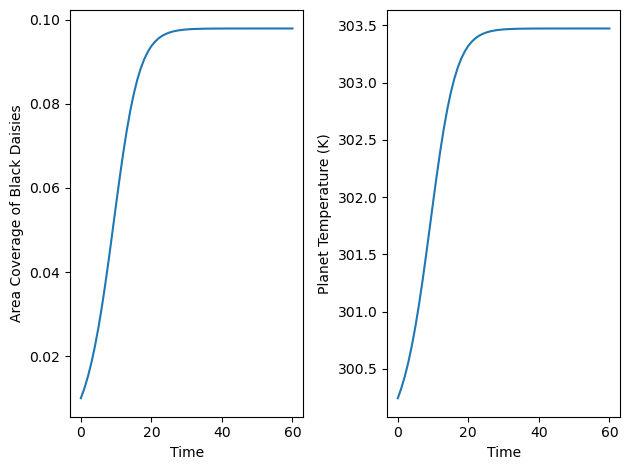

In [18]:
# Assume initial area coverage of white daisies is A_b = 0.01 
# Albedo of black daisies is alpha_b = 0.25
# Set luminosity to L = 1
A_black, Tp_black = Daisy_Area_Temp(L = 1, A = 0.01, alpha = 0.25)

fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].plot(A_black[:,0], A_black[:,1])
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Area Coverage of Black Daisies')

ax[1].plot(Tp_black[:,0], Tp_black[:,1])
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Planet Temperature (K)')

plt.tight_layout()

print(A_black[A_black.shape[0]-1])
print(Tp_black[Tp_black.shape[0]-1])

We see that a steady-state solution has been reached for a planet with only black daisies.

Specifically,  $A_{b} = 0.0979$ and  $T_{p} = 303 K$ at steady state.

From the temperature graph, the initial temperature of the black-daisy planet lies near the temperature that is optimal for daisy growth (295.5 K or 22.5 degrees Celsius). This facilitates the growth of black daisies initially.

For the black daisies, due to their low albedo, their increased coverage leads to a decrease in the overall albedo of the black-daisy planet hence increasing the overall temperature of the planet since there will be a larger solar flux being absorbed. This explains the initial sharp increase in planet temperature for the black-daisy planet.

For the black-daisy planet, an increase in effective planet temperature will mean a local temperature higher than the optimal temperature for daisy growth. As such, the area coverage of black daisies decrease since their growth rate is decreased. The overall planetary albedo will increase and cool the planet, providing a negative feedback to the increase in effective planet temperature. Hence, we see the effective planet temperature eventually stabilises when the negative feedback dominates.

A sharp increase in local temperature for the black-daisy planet will decrease daisy growth, resulting in a negative feedback to the daisy area coverage. This explains why the area coverage of black daisies reach an equilibrium after some time.

### Evoution of a world with black and white daisies

We modify the function to include both black and white daises in our Daisyworld. Similarly, we plot out the results from the simulation.

In [3]:
# Defining a function with inputs luminoisty, area coverages of 2 species of daisies and their respective albedos 
# Outputs the evolution arrays of each daisy coverage with time and planet temperature with time
def Two_Daisies_Area_Temp(L, A1, A2, alpha_1, alpha_2): 
    '''
    Function that uses Euler's method to solve the differential equation for the area coverages of two species of daisies.
    Outputs the evolution arrays of daisies' area coverages with time and planet temperature with time
    
    Inputs:
    L: Luminosity
    A1: Area coverage for first daisy species
    A2: Area coverage for second daisy species
    alpha_1: Albedo for first daisy species
    alpha_2: Albedo for second daisy species
    
    Outputs:
    A1_data: (n x 2) Array containing area coverage of first daisy species over time
    A2_data: (n x 2) Array containing area coverage of second daisy species over time
    Tp_data: (n x 2) Array containing planet temperature over time 
    '''
    delta_A1 = 1 # Arbitrary start for first daisy species
    delta_A2 = 1 # Arbitrary start for second daisy species
    A1_data = [] # Creating first species daisy area list
    A2_data = [] # Creating second species daisy area list
    Tp_data = [] # Creating planet temperature list
    
    t = 0 # Initial time assignment
    dt = 1 # Time step
    
    while delta_A1 > 0.00000001 or delta_A2 > 0.00000001 :  
        # Planet's albedo
        alpha_p = A1*alpha_1 + A2*alpha_2 + (1 - A1 - A2)*alpha_g
        
        # Effective planet's temperature (in Kelvins)
        Tp = (L*(S0/s)*(1 - alpha_p))**(1/4) 
        Tp_data.append([t,Tp]) # Append into planet temperature list
        A1_data.append([t,A1]) # Append into area list for first daisy species
        A2_data.append([t,A2]) # Append into area list for second daisy species
        
        # Local daisies' temperature (in Kelvins)
        Ti1 = (R*L*(S0/s)*(alpha_p - alpha_1) + Tp**(4))**(1/4) #Local temperature for first daisy species
        Ti2 = (R*L*(S0/s)*(alpha_p - alpha_2) + Tp**(4))**(1/4) #Local temperature for second daisy species
        
        # Growth rate of first daisy species
        beta_i1 = 1.0 - 0.003265*(295.5 - Ti1)**2 
        
        if beta_i1 < 0: # In case first species growth rate becomes negative
            beta_i1 = 0 # Setting it to negligible growth if the growth happens to be negative
        
        # Growth rate of second daisy species
        beta_i2 = 1.0 - 0.003265*(295.5 - Ti2)**2 
        
        if beta_i2 < 0: # In case second species growth becomes into negative
            beta_i2 = 0 # Setting it to negligible growth if the growth happens to be negative
        
        # Euler Method
        x = 1 - A1 - A2
        delta_A1 = A1*(beta_i1*x - 0.3)*dt
        A1_next = A1 + delta_A1
        A1 = A1_next
        delta_A2 = A2*(beta_i2*x - 0.3)*dt
        A2_next = A2 + delta_A2
        A2 = A2_next
        t += dt
    
    A1_data = np.array(A1_data)
    A2_data = np.array(A2_data)
    Tp_data = np.array(Tp_data)
    
    return A1_data, A2_data, Tp_data

[36.          0.37878698]
[36.         0.2461622]
[ 36.         294.76943019]


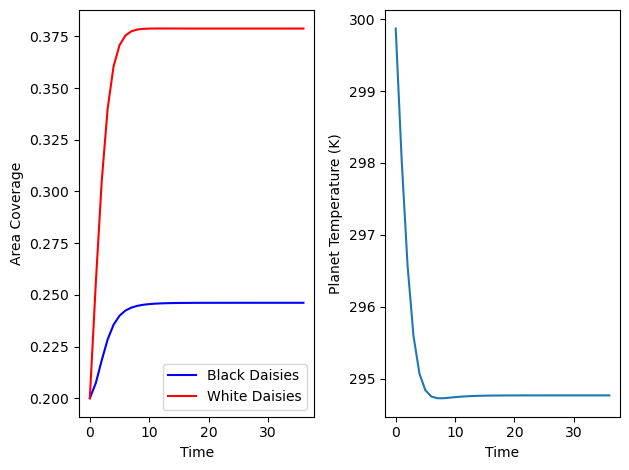

In [24]:
# Assume initial area coverage of black and white daisies to be each 0.2; A_b = 0.2 and A_w = 0.2
# Albedo of white daisies is alpha_w = 0.75; Albedo of black daisies is alpha_b = 0.25
# Set luminosity to L = 1
A_white, A_black, Tp = Two_Daisies_Area_Temp(L = 1, A1 = 0.2, A2 = 0.2, alpha_1 = 0.75, alpha_2 = 0.25)

fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].plot(A_black[:,0], A_black[:,1], color = 'blue', label = 'Black Daisies')
ax[0].plot(A_white[:,0], A_white[:,1], color = 'red', label = 'White Daisies')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Area Coverage')
ax[0].legend()

ax[1].plot(Tp[:,0], Tp[:,1])
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Planet Temperature (K)')

plt.tight_layout()

print(A_white[A_white.shape[0]-1])
print(A_black[A_black.shape[0]-1])
print(Tp[Tp.shape[0]-1])

White daisies growth exceeds that of black daisies in the beginning. This gives a net decrease in the effective planet temperature. As black daisies also increase in growth, this dampens the decrease in temperature by providing a negative feedback hence the planet temperature reaches an equilibrium at temperature lower than optimal temperature of daisy growth (295.5 K or 22.5 degrees Celsius). 

Likewise, the low temperature steady state as well as the increase in area coverages for black and white daisies will limit the amount of space for their growth, providing a negative feedback to the growth of the daisies. Eventually, the area coverage of both daisies will reach a steady state when the negative feedbacks dominate the positive feedbacks.

We now look at another situation. Here we try setting $L = 0.9$. 

[30.          0.25681296]
[30.          0.38513588]
[ 30.         296.65013611]


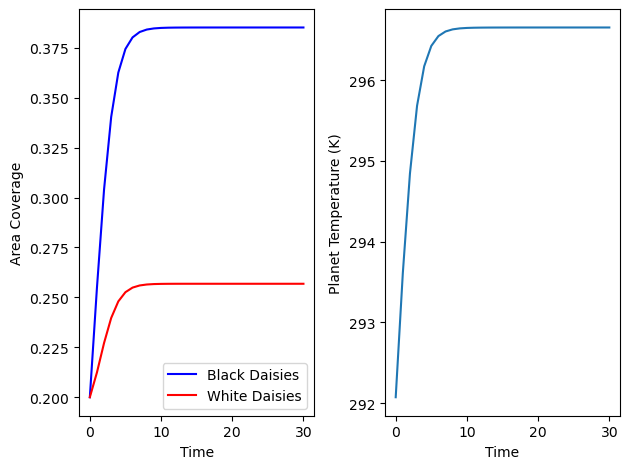

In [25]:
# Assume initial area coverage of black and white daisies to be each 0.2; A_b = 0.2 and A_w = 0.2
# Albedo of white daisies is alpha_w = 0.75; Albedo of black daisies is alpha_b = 0.25
# Set luminosity to L = 0.9
A_white, A_black, Tp = Two_Daisies_Area_Temp(L = 0.9, A1 = 0.2, A2 = 0.2, alpha_1 = 0.75, alpha_2 = 0.25)

fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].plot(A_black[:,0], A_black[:,1], color = 'blue', label = 'Black Daisies')
ax[0].plot(A_white[:,0], A_white[:,1], color = 'red', label = 'White Daisies')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Area Coverage')
ax[0].legend()

ax[1].plot(Tp[:,0], Tp[:,1])
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Planet Temperature (K)')

plt.tight_layout()

print(A_white[A_white.shape[0]-1])
print(A_black[A_black.shape[0]-1])
print(Tp[Tp.shape[0]-1])

Now, black daisies growth greatly exceeds that of white daisies in the beginning. This gives a net increase in the effective planet temperature. As the area coverage of white daisies also increase in growth, it dampens the increase in temperature by providing a negative feedback hence the planet temperature reaches an equilibrium at temperature higher than optimal temperature for daisy growth.

The high temperature steady state as well as the increase in area coverages for black and white daisies will limit the amount of space for their growth, providing a negative feedback to the growth of the daisies. Eventually, the area coverage of both daisies will reach a steady state when the negative feedbacks dominate the positive feedbacks.

Considering a fixed solar luminosity, a certain species of daisy growth (white or black) will be preferred initially depending on solar luminosity. The planet temperature will eventually stabilise at a temperature either slightly above or below the optimal temperature for daisy growth (depending on the albedo of the daisy species whose growth was preferred initially) since the growth of the other species of daisies will always provide a negative feedback in regulating the effective planet temperature.

### Area Coverage of White Daisies and Planet Temperature versus Luminosity

We would like to see how the area coverage of a particular species of daisy evolve over time with luminosity. We slightly modify the function `Daisy_Area_Temp` to output (a more precise) the equilibrium area and planet temperature. 

We first simulate for a white-daisy planet.

In [4]:
# Modify the function `Daisy_Area_Temp` to output only the equilibrium area and planet temperature
# Set a threshold for area coverage
# Lets call this new function Eq_Daisy_Area_Temp
def Eq_Daisy_Area_Temp(L, A, alpha): 
    '''
    Function that uses Euler's method to solve the differential equation for the area coverage of a particular species of daisy.
    Outputs the equilibrium daisy area coverage and planet temperature 
    
    Inputs:
    L: Luminosity
    A: Area coverage for a particular species
    alpha: Albedo for a specific species of daisy
    
    Outputs:
    A: Equilibrium daisy area coverage
    Tp: Equilibrium planet temperature
    '''
    delta_A = 1 #Arbitrary start for daisy area coverage
    diff_Tp = 1 #Arbitrary start for planet temperature
    Tp = 0 #Arbitrary start for planet temperature
    t = 0 #Initial time assignment
    dt = 0.01 # Smaller time step
    
    while delta_A > 0.00000001 or diff_Tp > 0.00000001:
        Tp_ref = Tp #Set a starting reference for the planet temperature since we want to compare difference
        
        # Planet's albedo
        alpha_p = A*alpha + (1 - A)*alpha_g
        
        # Effective planet's temperature (in Kelvins)
        Tp = (L*(S0/s)*(1 - alpha_p))**(1/4) 
        
        # Local daisy's temperature (in Kelvins)
        Ti = (R*L*(S0/s)*(alpha_p - alpha) + Tp**(4))**(1/4) 
        
        # Growth rate of daisy
        beta_i = 1.0 - 0.003265*(295.5 - Ti)**2 #if condition to ensure growth does not fall into negative
        
        # In case growth rate becomes negative
        if beta_i < 0: 
            beta_i = 0 # Setting it to negligible growth if the growth happens to be negative
        
        x = 1 - A
        
        if A < 0.001:
            A = 0.001 # Setting a threshold for the area coverage of the daisy in case they die completely
        
        # Euler's Method
        delta_A = A*(beta_i*x - 0.3)*dt
        diff_Tp = Tp - Tp_ref
        A_next = A + delta_A
        A = A_next
        t += dt
    
    return A, Tp - 273.15 # Return temperature in degrees Celsius

We consider two directions of varying luminosity (i.e. increasing versus decreasing). For a specific luminosity, the equilibrium area coverage is used for the subsequent luminosity. This will allow us to observe hysteresis loops.

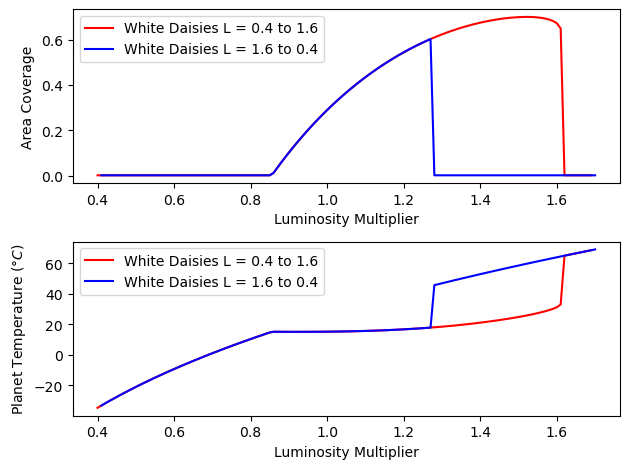

In [5]:
# For a specific luminosity multiplier, the equilibrium area coverage is used for the subsequent luminosity multiplier
# This will allow us to observe hysteresis loops
# We consider two directions of varying luminosity (i.e. increasing versus decreasing)

# Creating lists
White_Daisy_Area_up = []
White_Daisy_Tp_up = []
White_Daisy_Area_down = []
White_Daisy_Tp_down = []

# First, we consider an increasing direction of luminosity 
A_start_up = 0.1 # Lets start with this area coverage of white daisies

# Increasing direction of luminosity multiplier
for i in np.arange(0.4, 1.7, 0.01): 
    A, Tp = Eq_Daisy_Area_Temp(i, A_start_up, 0.75)
    White_Daisy_Area_up.append([i,A])
    White_Daisy_Tp_up.append([i,Tp])
    A_start_up = A

White_Daisy_Area_up = np.array(White_Daisy_Area_up)
White_Daisy_Tp_up = np.array(White_Daisy_Tp_up)

# Next, we consider a decreasing direction of luminosity
A_start_down = 0.1 #Lets start with this area coverage of white daisies

# Decreasing direction of luminosity multiplier
for i in np.arange(1.7,0.4,-0.01): 
    A, Tp = Eq_Daisy_Area_Temp(i, A_start_down, 0.75)
    White_Daisy_Area_down.append([i,A])
    White_Daisy_Tp_down.append([i,Tp])
    A_start_down = A

White_Daisy_Area_down = np.array(White_Daisy_Area_down)
White_Daisy_Tp_down = np.array(White_Daisy_Tp_down)

fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].plot(White_Daisy_Area_up[:,0], White_Daisy_Area_up[:,1], color='red', label = 'White Daisies L = 0.4 to 1.6')
ax[0].plot(White_Daisy_Area_down[:,0], White_Daisy_Area_down[:,1], color='blue', label = 'White Daisies L = 1.6 to 0.4')
ax[0].set_xlabel('Luminosity Multiplier')
ax[0].set_ylabel('Area Coverage')
ax[0].legend()

ax[1].plot(White_Daisy_Tp_up[:,0], White_Daisy_Tp_up[:,1], color='red', label = 'White Daisies L = 0.4 to 1.6')
ax[1].plot(White_Daisy_Tp_down[:,0], White_Daisy_Tp_down[:,1], color='blue', label = 'White Daisies L = 1.6 to 0.4')
ax[1].set_xlabel('Luminosity Multiplier')
ax[1].set_ylabel('Planet Temperature ($\degree C$)')
ax[1].legend()

plt.tight_layout()

The curves shown here the effect of increasing (or decreasing) the luminosity slowly, so that the system has time to reach steady state at each value of solar luminosity. In this case, the system exhibits hysteresis; the effect of decreasing the luminosity is not identical to that of increasing it within a certain range of luminosities.

Let us now simulate these plots for a black-daisy world.

### Area Coverage of Black Daisies and Planet Temeprature Versus Luminosity

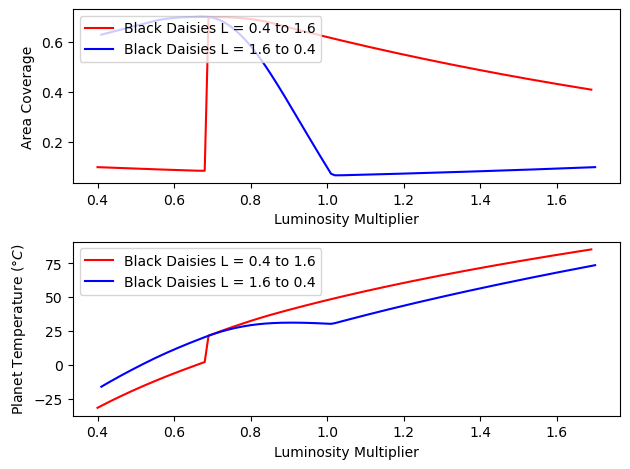

In [8]:
# Creating lists
Black_Daisy_Area_up = []
Black_Daisy_Tp_up = []
Black_Daisy_Area_down = []
Black_Daisy_Tp_down = []

# First, we consider an increasing direction of luminosity 
A_start_up = 0.1 # Lets start with this area coverage of black daisies

# Increasing direction of luminosity multiplier
for i in np.arange(0.4, 1.7, 0.01): 
    A, Tp = Eq_Daisy_Area_Temp(i, A_start_up, 0.25)
    Black_Daisy_Area_up.append([i,A])
    Black_Daisy_Tp_up.append([i,Tp])
    A_start_up = A

Black_Daisy_Area_up = np.array(Black_Daisy_Area_up)
Black_Daisy_Tp_up = np.array(Black_Daisy_Tp_up)

# Next, we consider a decreasing direction of luminosity
A_start_down = 0.1 #Lets start with this area coverage of black daisies

# Decreasing direction of luminosity multiplier
for i in np.arange(1.7,0.4,-0.01): 
    A, Tp = Eq_Daisy_Area_Temp(i, A_start_down, 0.25)
    Black_Daisy_Area_down.append([i,A])
    Black_Daisy_Tp_down.append([i,Tp])
    A_start_down = A

Black_Daisy_Area_down = np.array(Black_Daisy_Area_down)
Black_Daisy_Tp_down = np.array(Black_Daisy_Tp_down)

fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].plot(Black_Daisy_Area_up[:,0], Black_Daisy_Area_up[:,1], color='red', label = 'Black Daisies L = 0.4 to 1.6')
ax[0].plot(Black_Daisy_Area_down[:,0], Black_Daisy_Area_down[:,1], color='blue', label = 'Black Daisies L = 1.6 to 0.4')
ax[0].set_xlabel('Luminosity Multiplier')
ax[0].set_ylabel('Area Coverage')
ax[0].legend(loc = 'upper left')

ax[1].plot(Black_Daisy_Tp_up[:,0], Black_Daisy_Tp_up[:,1], color='red', label = 'Black Daisies L = 0.4 to 1.6')
ax[1].plot(Black_Daisy_Tp_down[:,0], Black_Daisy_Tp_down[:,1], color='blue', label = 'Black Daisies L = 1.6 to 0.4')
ax[1].set_xlabel('Luminosity Multiplier')
ax[1].set_ylabel('Planet Temperature ($\degree C$)')
ax[1].legend()

plt.tight_layout()

Interestingly, unlike the white-daisy world, we observe no hysteresis loops for the black-daisy world. The effect of decreasing luminosity is entirely not identical to the effect of increasing luminosity.  

We now model a world where black and white daisies co-exist and see how varying luminosity affects their growth. 

### Area Coverage of Black and White Daisies and Planet Temperature versus Luminosity 

Here we focus on an increasing direction for luminosity.

In [5]:
# Modify the function Eq_Daisy_Area_Temp to accomodate two species of daisies
# Set thresholds for their area coverages
# Lets call this new function Eq_Two_Daisies_Area_Temp

def Eq_Two_Daisies_Area_Temp(L,A1,A2,alpha_1,alpha_2): 
    '''
    Function that uses Euler's method to solve the differential equation for the area coverages of two species of daisies.
    Outputs the equilibrium daisies' area coverages and planet temperature 
    
    Inputs:
    L: Luminosity
    A1: Area coverage for a first species of daisy
    A2: Area coverage for a second species of daisy
    alpha1: Albedo for first species of daisy
    alpha2: Albedo for second species of daisy
    
    Outputs:
    A1: Equilibrium area coverage for first species of daisy
    A2: Equilibrium area coverage for second species of daisy
    Tp: Equilibrium planet temperature
    '''
    delta_A1 = 1 # Arbitrary start for first daisy species
    delta_A2 = 1 # Arbitrary start for second daisy species
    diff_Tp = 1 # Arbitrary start for planet temperature
    Tp = 0 # Arbitrary start for planet temperature
    t = 0 # Initial time assignment
    dt = 1 # Time step
    
    while delta_A1 > 0.00000001 or delta_A2 > 0.00000001 or diff_Tp > 0.00000001:
        Tp_ref = Tp # Set a starting reference for the planet temperature since we want to compare difference
        
        # Planet's albedo
        alpha_p = A1*alpha_1 + A2*alpha_2 + (1 - A1 - A2)*alpha_g
        
         # Effective planet's temperature (in Kelvins)
        Tp = (L*(S0/s)*(1 - alpha_p))**(1/4) 
        
        # Local temperature for first daisy species (in Kelvins)
        Ti1 = (0.2*L*(S0/s)*(alpha_p - alpha_1) + Tp**(4))**(1/4) 
        # Local temperature for second daisy species (in Kelvins)
        Ti2 = (0.2*L*(S0/s)*(alpha_p - alpha_2) + Tp**(4))**(1/4) 
        
        # Growth rate of first species of daisy
        beta_i1 = 1.0 - 0.003265*(295.5 - Ti1)**2 
        # In case first species growth rate becomes negative
        if beta_i1 < 0: 
            beta_i1 = 0 # Setting it to negligible growth if the growth happens to be negative
        
        # Growth rate of second species of daisy
        beta_i2 = 1.0 - 0.003265*(295.5 - Ti2)**2 
        # In case second species growth rate becomes negative
        if beta_i2 < 0: 
            beta_i2 = 0 # Setting it to negligible growth if the growth happens to be negative
        
        x = 1-A1-A2
        
        if A1 < 0.001:
            A1 = 0.001 # Setting a threshold for the area coverage of the first daisy species
        if A2 < 0.001:
            A2 = 0.001 # Setting a threshold for the area coverage of the second daisy species
        
        # Euler's Method
        delta_A1 = A1*(beta_i1*x - 0.3)*dt
        A1_next = A1 + delta_A1
        A1 = A1_next
        delta_A2 = A2*(beta_i2*x - 0.3)*dt
        A2_next = A2 + delta_A2
        A2 = A2_next
        diff_Tp = Tp - Tp_ref
        t += dt
    
    return A1, A2, Tp - 273.15

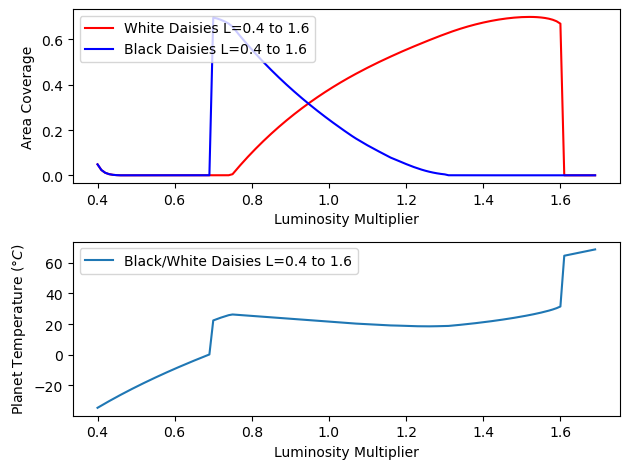

In [7]:
# Creating lists
# We only plot the curve for increasing luminosity
Daisies_White_Area_up = []
Daisies_Black_Area_up = []
Daisies_Tp_up = []

# For a specific luminosity multiplier, the equilibrium area coverage is used for the subsequent luminosity multiplier
A1_start_up = 0.1 # Lets start with this area coverage of white daisies
A2_start_up = 0.1 # Lets start with this area coverage of black daisies
for i in np.arange(0.4,1.7,0.01):
    A1, A2, Tp = Eq_Two_Daisies_Area_Temp(i,A1_start_up,A2_start_up,0.75,0.25)
    Daisies_White_Area_up.append([i,A1])
    Daisies_Black_Area_up.append([i,A2])
    Daisies_Tp_up.append([i,Tp])
    A1_start_up = A1
    A2_start_up = A2
    
Daisies_White_Area_up = np.array(Daisies_White_Area_up)
Daisies_Black_Area_up = np.array(Daisies_Black_Area_up)
Daisies_Tp_up = np.array(Daisies_Tp_up)

fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].plot(Daisies_White_Area_up[:,0], Daisies_White_Area_up[:,1], color='red', label = 'White Daisies L=0.4 to 1.6')
ax[0].plot(Daisies_Black_Area_up[:,0], Daisies_Black_Area_up[:,1], color='blue', label = 'Black Daisies L=0.4 to 1.6')
ax[0].set_xlabel('Luminosity Multiplier')
ax[0].set_ylabel('Area Coverage')
ax[0].legend(loc='upper left')

ax[1].plot(Daisies_Tp_up[:,0], Daisies_Tp_up[:,1], label = 'Black/White Daisies L=0.4 to 1.6')
ax[1].set_xlabel('Luminosity Multiplier')
ax[1].set_ylabel('Planet Temperature ($\degree C$)')
ax[1].legend(loc='upper left')

plt.tight_layout()

We noticed from the graphs that there exists a stable region where the two species of daisy coexist. Within this region, the effective planet's temperature slightly decreases with increasing luminosity.

This concludes this short project.